In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_path = os.path.join("data/city_data.csv")
ride_path = os.path.join("data/ride_data.csv")



In [9]:
# Read the City and Ride Data
city_df=pd.read_csv(city_path)
ride_df=pd.read_csv(ride_path)

city_df.head()
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [17]:
# Combine the data into a single dataset
combined_df = pd.merge(city_df, ride_df, on = "city")


In [18]:
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [26]:
# Obtain the x and y coordinates for each of the three city types

#Average Fare ($) Per City
average_fare_df = combined_df.groupby("city")["fare"].mean()
average_fare_df = pd.DataFrame(average_fare_df).reset_index()
average_fare_df = average_fare_df.rename(columns = {'fare': 'avg_fare'})

# minor clean up of fair to 2 decimal places
average_fare_df.head().round(2)


,city,avg_fare
0,Amandaburgh,24.64
1,Barajasview,25.33
2,Barronchester,36.42
3,Bethanyland,32.96
4,Bradshawfurt,40.06


In [28]:
# Total Number of Rides Per City
total_rides_df = combined_df.groupby("city")["ride_id"].count()
total_rides_df = pd.DataFrame(total_rides_df).reset_index()
total_rides_df = total_rides_df.rename(columns = {"ride_id": "total_rides"})

#preview display of total rides per city
total_rides_df.head()
# Total Number of Drivers Per City
# City Type (Urban, Suburban, Rural)

,city,total_rides
0,Amandaburgh,18
1,Barajasview,22
2,Barronchester,16
3,Bethanyland,18
4,Bradshawfurt,10


In [33]:
# Total Number of Drivers Per City
# total_drivers_df = combined_df.groupby ("city")["driver_count"].drop_duplicates("city")
total_drivers_df = combined_df[["city", "driver_count"]].drop_duplicates("city")
total_drivers_df=total_drivers_df.rename(columns ={"driver_count": "drivers"})
#preview display of total drivers by city
total_drivers_df.head()

,city,drivers
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [36]:
# City Type (Urban, Suburban, Rural)

city_type_df = combined_df[["city", "type"]].drop_duplicates("city")
# print just to make sure all types are represented
city_type_df

,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban
124,West Anthony,Urban
154,West Angela,Urban
193,Martinezhaven,Urban
217,Karenberg,Urban
234,Barajasview,Urban


In [38]:
# Build the scatter plots for each city types
master_df = pd.merge(pd.merge(pd.merge(average_fare_df, total_rides_df, on="city"), 
                             total_drivers_df, on="city"), city_type_df, on="city")


#Bubble Plot Data for each type
urban_type = master_df.loc[master_df['type'] == 'Urban']
suburban_type = master_df.loc[master_df['type'] == 'Suburban']
rural_type = master_df.loc[master_df['type'] == 'Rural']


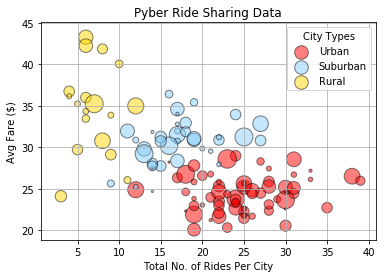

In [46]:
#plot the data

ax1 = urban_type.plot(kind='scatter',x='total_rides', y='avg_fare',
                       color='red', s=master_df['drivers']*5, label = 'Urban', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1)    
ax2 = suburban_type.plot(kind='scatter', x='total_rides', y='avg_fare', 
                          color='lightskyblue',s=master_df['drivers']*5, label = 'Suburban', 
                          alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)    
ax3 = rural_type.plot(kind='scatter', x='total_rides', y='avg_fare', 
                       color='gold', s=master_df['drivers']*5, label = 'Rural', 
                       alpha = 0.5, edgecolor = "black", linewidths = 1, ax=ax1)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total No. of Rides Per City")
plt.ylabel("Avg Fare ($)")

# Create a legend
plt.legend(title = 'City Types')
plt.grid(True)

# Show plot
plt.show()

## Total Fares by City Type

In [52]:
# Calculate Type Percents

total_fares_df = combined_df["fare"].sum()
urban_fares_df = combined_df.loc[combined_df["type"] == "Urban", "fare"].sum()
rural_fares_df = combined_df.loc[combined_df["type"] == "Rural", "fare"].sum()
suburban_fares_df = combined_df.loc[combined_df["type"] == "Suburban", "fare"].sum()
urban_fares_pct = round(urban_fares_df/total_fares_df, 2) *100
rural_fares_pct = round(rural_fares_df/total_fares_df, 2) *100
suburban_fares_pct = round(suburban_fares_df/total_fares_df, 2) *100
# Build Pie Chart

# Save Figure


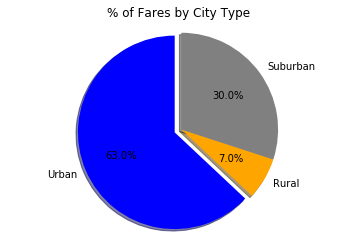

In [59]:
# Build Pie Chart

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_fares_pct, rural_fares_pct, suburban_fares_pct]
explode = (0.075, 0, 0)  

# Save Figure
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ["blue", "orange", "gray"])
# Ensure pie chart is a circle
ax1.axis('equal')  

#add a title
plt.title("% of Fares by City Type")

# Show Figure
plt.show()

## Total Rides by City Type

In [60]:
# Calculate Ride Percents
total_rides_df = len(combined_df)
urban_rides_df = round(combined_df.loc[combined_df["type"] == "Urban", "ride_id"].count()/total_rides_df, 2) * 100
rural_rides_df = round(combined_df.loc[combined_df["type"] == "Rural", "ride_id"].count()/total_rides_df, 2) * 100
suburban_rides_df = round(combined_df.loc[combined_df["type"] == "Suburban", "ride_id"].count()/total_rides_df, 2) * 100



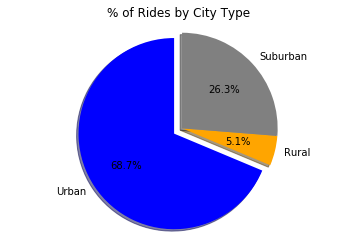

In [62]:
# Build Pie Chart

labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_rides_df, rural_rides_df, suburban_rides_df]
explode = (0.1, 0, 0)  

# Save Figure
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ["blue", "orange", "gray"])
# make sure pie chart is a circle
ax1.axis('equal')  

# add title
plt.title("% of Rides by City Type")

# Show Figure
plt.show()

## Total Drivers by City Type

In [65]:
# Calculate Driver Percents

total_drivers_df = master_df["drivers"].sum()
urban_drivers_df = round(master_df.loc[master_df["type"] == "Urban", "drivers"].sum()/total_drivers_df, 2)* 100
rural_drivers_df = round(master_df.loc[master_df["type"] == "Rural", "drivers"].sum()/total_drivers_df, 2)* 100
suburban_drivers_df = round(master_df.loc[master_df["type"] == "Suburban", "drivers"].sum()/total_drivers_df, 2)* 100



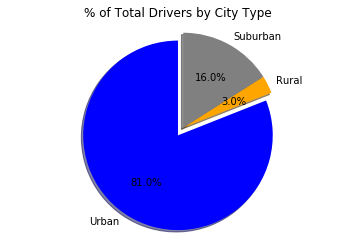

In [66]:
# Build Pie Charts
labels = 'Urban', 'Rural', 'Suburban'
sizes = [urban_drivers_df, rural_drivers_df, suburban_drivers_df]
explode = (0.1, 0, 0) 

# Save Figure
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ["blue", "orange", "gray"])

#make chart a perfect circle
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#add title
plt.title("% of Total Drivers by City Type")

#display chart
plt.show()